##  Verimiz zararlı veya zararsız web sitesi diye url uzantılarından web sitelerini sınıflandıracağımız bir web sitesi verisi. (Veri, rakamlar vs. gerçeklik içermemektedir.) 
## 1-->zararlı 0--->zararsız

In [42]:
import pandas as pd
import numpy as np

In [43]:
dataFrame=pd.read_excel("maliciousornot.xlsx")

In [44]:
dataFrame

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [45]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [46]:
# Kolonların non-nul olduğunu ve veri tiplerininde int ve floatlardan oluştuğunu görüyoruz. Yani bir sıkıntımız yok.

In [47]:
dataFrame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [48]:
dataFrame.corr()["Type"].sort_values()            #dataFrame içerisindeki kolonların type a göre korelasyonunu çıkarttık.

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [49]:
# Veriyi daha iyi anlayabilmek için görselleştirebilmek adına gerekli importarı yapalım :

import matplotlib.pyplot as plt
import seaborn as sbn

<AxesSubplot:xlabel='Type', ylabel='count'>

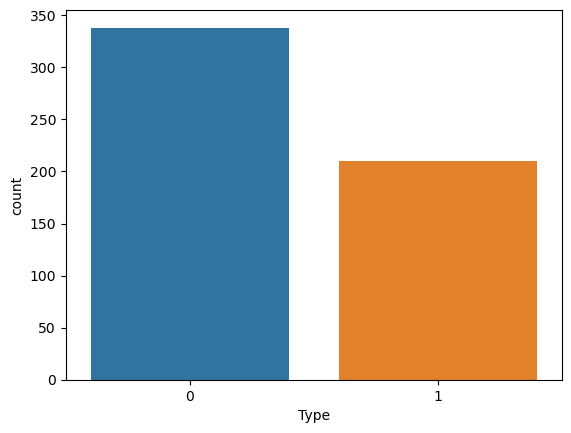

In [50]:
sbn.countplot(x="Type",data=dataFrame)

In [51]:
# Bize kaç  tane 0 ve kaç tane 1 olduğunu verdi. Zaten bunlar type in ortalama değerinden de anlaşııyordu. 

<AxesSubplot:>

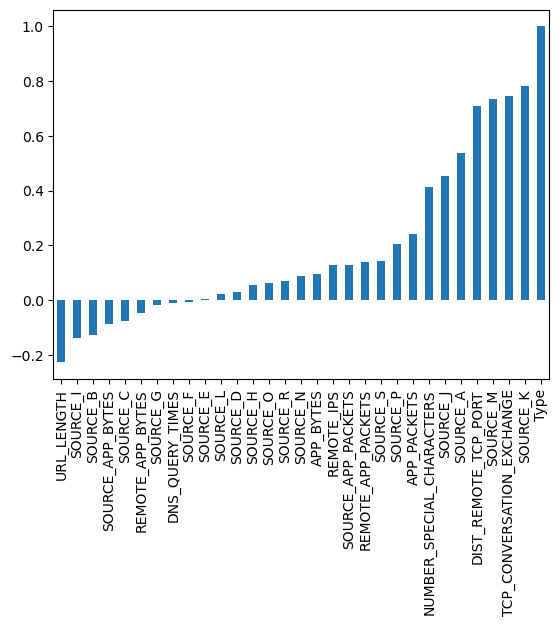

In [52]:
dataFrame.corr()["Type"].sort_values().plot(kind="bar")

In [53]:
# x ve y leri ayıralım. (Trian-test split)

In [54]:
y=dataFrame["Type"].values   # x de y harici he rşey olacak
x=dataFrame.drop("Type",axis=1).values

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=15)

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler=MinMaxScaler()

In [59]:
scaler.fit(x_train)

MinMaxScaler()

In [60]:
x_train=scaler.fit_transform(x_train)

In [61]:
x_test=scaler.fit_transform(x_test)

In [62]:
# x_train ve x_test 0 ve 1 e göre yeni değerler ile değiştirilecek

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## dropout , overfitting olaylarını engellemek için kullanılacak. (Ezberleme)

In [64]:
x_train.shape

(383, 30)

In [65]:
#Model Oluşturma
model=Sequential()

#Katmanları Oluşturma
# 30 tane nöron koy dedik. (30 tane kolon var diye lakin zorunda değiliz . Genelde böyle yapılır. Duruma göre değişir.)
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))  
# output layer ına sigmout fonksiyonunu verdik. Sigmoid bizim için 0 ve 1 arasında bir değer verir.

# Bu zamana kadar loss değeri için mse(mean squared error) kullandık ancak bu bir regresyon olduğu için bunda loss fonk. değişti.
model.compile(loss="binary_crossentropy",optimizer="adam")

In [66]:
# Modeli train edelim.
#validation_data --> Doğrulama datasını da öğrenme aşamasında modele veriyoruz.

model.fit(x=x_train, y=y_train, epochs=700,validation_data=(x_test,y_test),verbose=1)

Epoch 1/700
12/12 [==============================] - 1s 12ms/step - loss: 0.6841 - val_loss: 0.6882
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6603 - val_loss: 0.6719
Epoch 3/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6302 - val_loss: 0.6490
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5994 - val_loss: 0.6192
Epoch 5/700
12/12 [==============================] - 0s 9ms/step - loss: 0.5630 - val_loss: 0.5778
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5208 - val_loss: 0.5368
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4704 - val_loss: 0.4886
Epoch 8/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4230 - val_loss: 0.4415
Epoch 9/700
12/12 [==============================] - 0s 6ms/step - loss: 0.3773 - val_loss: 0.4040
Epoch 10/700
12/12 [==============================] - 0s 6ms/step - loss: 0.3329 - val_loss: 0.3668
Epoch 11

Epoch 83/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0479 - val_loss: 0.2984
Epoch 84/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0467 - val_loss: 0.2602
Epoch 85/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0462 - val_loss: 0.2837
Epoch 86/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0458 - val_loss: 0.2697
Epoch 87/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0446 - val_loss: 0.2581
Epoch 88/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0460 - val_loss: 0.2785
Epoch 89/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0437 - val_loss: 0.2801
Epoch 90/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0432 - val_loss: 0.2943
Epoch 91/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0442 - val_loss: 0.2973
Epoch 92/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0445 - val_loss: 0.2683


12/12 [==============================] - 0s 5ms/step - loss: 0.0189 - val_loss: 0.4233
Epoch 165/700
12/12 [==============================] - 0s 9ms/step - loss: 0.0192 - val_loss: 0.3711
Epoch 166/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0203 - val_loss: 0.4080
Epoch 167/700
12/12 [==============================] - 0s 7ms/step - loss: 0.0196 - val_loss: 0.4135
Epoch 168/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0178 - val_loss: 0.3851
Epoch 169/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0188 - val_loss: 0.4020
Epoch 170/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0179 - val_loss: 0.3880
Epoch 171/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0180 - val_loss: 0.3949
Epoch 172/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0183 - val_loss: 0.3799
Epoch 173/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0177 - val_loss: 0.4287
Epoc

12/12 [==============================] - 0s 6ms/step - loss: 0.0063 - val_loss: 0.4871
Epoch 246/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0063 - val_loss: 0.4956
Epoch 247/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.4837
Epoch 248/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0060 - val_loss: 0.5126
Epoch 249/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0060 - val_loss: 0.4961
Epoch 250/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.5220
Epoch 251/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0059 - val_loss: 0.5255
Epoch 252/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0055 - val_loss: 0.4731
Epoch 253/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.5554
Epoch 254/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.4775
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.5959
Epoch 327/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.6026
Epoch 328/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.5990
Epoch 329/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.5913
Epoch 330/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.6160
Epoch 331/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.6107
Epoch 332/700
12/12 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.6046
Epoch 333/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - val_loss: 0.6076
Epoch 334/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0027 - val_loss: 0.6472
Epoch 335/700
12/12 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.5749
Epoc

12/12 [==============================] - 0s 4ms/step - loss: 9.5704e-04 - val_loss: 0.7475
Epoch 408/700
12/12 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.6906
Epoch 409/700
12/12 [==============================] - 0s 5ms/step - loss: 8.5532e-04 - val_loss: 0.7358
Epoch 410/700
12/12 [==============================] - 0s 5ms/step - loss: 9.4133e-04 - val_loss: 0.7018
Epoch 411/700
12/12 [==============================] - 0s 5ms/step - loss: 7.5497e-04 - val_loss: 0.7403
Epoch 412/700
12/12 [==============================] - 0s 5ms/step - loss: 8.1446e-04 - val_loss: 0.7164
Epoch 413/700
12/12 [==============================] - 0s 4ms/step - loss: 7.7006e-04 - val_loss: 0.6997
Epoch 414/700
12/12 [==============================] - 0s 6ms/step - loss: 8.6300e-04 - val_loss: 0.7109
Epoch 415/700
12/12 [==============================] - 0s 5ms/step - loss: 8.6985e-04 - val_loss: 0.7148
Epoch 416/700
12/12 [==============================] - 0s 6ms/step - loss

12/12 [==============================] - 0s 4ms/step - loss: 3.8287e-04 - val_loss: 0.7924
Epoch 486/700
12/12 [==============================] - 0s 5ms/step - loss: 4.1675e-04 - val_loss: 0.8036
Epoch 487/700
12/12 [==============================] - 0s 5ms/step - loss: 4.4104e-04 - val_loss: 0.8111
Epoch 488/700
12/12 [==============================] - 0s 5ms/step - loss: 3.9016e-04 - val_loss: 0.8085
Epoch 489/700
12/12 [==============================] - 0s 5ms/step - loss: 4.4407e-04 - val_loss: 0.8025
Epoch 490/700
12/12 [==============================] - 0s 4ms/step - loss: 4.4992e-04 - val_loss: 0.8307
Epoch 491/700
12/12 [==============================] - 0s 5ms/step - loss: 3.8112e-04 - val_loss: 0.8190
Epoch 492/700
12/12 [==============================] - 0s 4ms/step - loss: 3.9742e-04 - val_loss: 0.8179
Epoch 493/700
12/12 [==============================] - 0s 4ms/step - loss: 4.6158e-04 - val_loss: 0.7876
Epoch 494/700
12/12 [==============================] - 0s 4ms/step - 

12/12 [==============================] - 0s 4ms/step - loss: 4.3127e-04 - val_loss: 1.0135
Epoch 564/700
12/12 [==============================] - 0s 6ms/step - loss: 4.5039e-04 - val_loss: 1.0423
Epoch 565/700
12/12 [==============================] - 0s 5ms/step - loss: 4.1735e-04 - val_loss: 1.0296
Epoch 566/700
12/12 [==============================] - 0s 4ms/step - loss: 4.1186e-04 - val_loss: 1.0263
Epoch 567/700
12/12 [==============================] - 0s 6ms/step - loss: 4.1943e-04 - val_loss: 1.0301
Epoch 568/700
12/12 [==============================] - 0s 5ms/step - loss: 4.0877e-04 - val_loss: 1.0227
Epoch 569/700
12/12 [==============================] - 0s 5ms/step - loss: 4.0563e-04 - val_loss: 1.0198
Epoch 570/700
12/12 [==============================] - 0s 5ms/step - loss: 4.1694e-04 - val_loss: 1.0342
Epoch 571/700
12/12 [==============================] - 0s 5ms/step - loss: 4.0387e-04 - val_loss: 1.0245
Epoch 572/700
12/12 [==============================] - 0s 4ms/step - 

12/12 [==============================] - 0s 4ms/step - loss: 2.9330e-04 - val_loss: 1.0837
Epoch 642/700
12/12 [==============================] - 0s 4ms/step - loss: 2.9247e-04 - val_loss: 1.0576
Epoch 643/700
12/12 [==============================] - 0s 6ms/step - loss: 2.8285e-04 - val_loss: 1.0678
Epoch 644/700
12/12 [==============================] - 0s 6ms/step - loss: 2.8656e-04 - val_loss: 1.0580
Epoch 645/700
12/12 [==============================] - 0s 5ms/step - loss: 2.7714e-04 - val_loss: 1.0662
Epoch 646/700
12/12 [==============================] - 0s 4ms/step - loss: 2.9503e-04 - val_loss: 1.0920
Epoch 647/700
12/12 [==============================] - 0s 5ms/step - loss: 2.7627e-04 - val_loss: 1.0705
Epoch 648/700
12/12 [==============================] - 0s 4ms/step - loss: 2.7202e-04 - val_loss: 1.0675
Epoch 649/700
12/12 [==============================] - 0s 5ms/step - loss: 2.7149e-04 - val_loss: 1.0628
Epoch 650/700
12/12 [==============================] - 0s 4ms/step - 

In [67]:
model.history.history

{'loss': [0.684138298034668,
  0.6603416204452515,
  0.6302361488342285,
  0.5993554592132568,
  0.5629897713661194,
  0.5207861065864563,
  0.4704477787017822,
  0.4229534864425659,
  0.37730133533477783,
  0.33291497826576233,
  0.29341477155685425,
  0.26124587655067444,
  0.23422329127788544,
  0.21544748544692993,
  0.19700834155082703,
  0.1809941977262497,
  0.16920940577983856,
  0.15994369983673096,
  0.15183621644973755,
  0.1448240727186203,
  0.1374547779560089,
  0.1383458822965622,
  0.1359798163175583,
  0.13345973193645477,
  0.1181105300784111,
  0.11732803285121918,
  0.11157732456922531,
  0.1094050258398056,
  0.10411150753498077,
  0.10242891311645508,
  0.09855065494775772,
  0.09596799314022064,
  0.09424526989459991,
  0.09303795546293259,
  0.09727023541927338,
  0.08900939673185349,
  0.08804568648338318,
  0.08698911219835281,
  0.08928751945495605,
  0.08320969343185425,
  0.07981812953948975,
  0.078694649040699,
  0.07839588820934296,
  0.07509057968854904

In [68]:
# Kayıp değerleri (loss) lar ı gördük.

## Model in epoch değeri "overfitting" olayını anlayabilmek adına kasıtlı olarak fazla verildi. Şimdi kayıp değerlerimizi dataFrame e alıp çizdirelim :

In [69]:
modelKaybi=pd.DataFrame(model.history.history)

<AxesSubplot:>

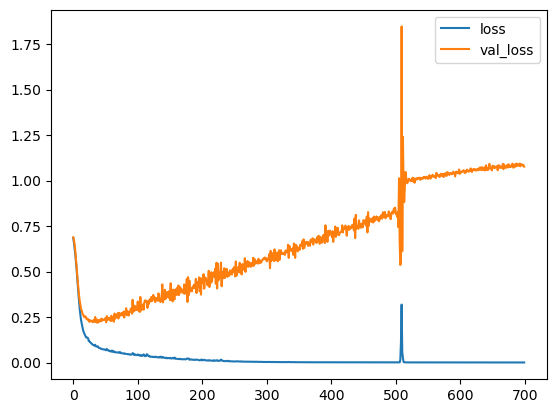

In [70]:
modelKaybi.plot()

In [71]:
# Normalde iki değerinde berabere aşağı doğru inip azalması lazım iken overfitting olayından ötürü saçma bir grafik ortaya çıktı.

## Bu yüzden validation_loss değerinin saçma sapan artmaya başladığı yerde epoch durdurulabilr. EarlyStopping ile bu olayı gerçekleştirelim :

In [72]:
#Model Oluşturma
model=Sequential()

#Katmanları Oluşturma
# 30 tane nöron koy dedik. (30 tane kolon var diye lakin zorunda değiliz . Genelde böyle yapılır. Duruma göre değişir.)
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))  
# output layer ına sigmout fonksiyonunu verdik. Sigmoid bizim için 0 ve 1 arasında bir değer verir.

# Bu zamana kadar loss değeri için mse(mean squared error) kullandık ancak bu bir regresyon olduğu için bunda loss fonk. değişti.
model.compile(loss="binary_crossentropy",optimizer="adam")

In [73]:
earlyStopping=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

## Patience değeri az verilirse daha erken durma, fazla verilirse daha geç durma gibi durumlar ortaya çıkabilir. Bu yüzden genelde 20-25 bandındadır.Duruma göre denenir.

In [74]:
model.fit(x=x_train , y=y_train, epochs=700, validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 13ms/step - loss: 0.6978 - val_loss: 0.6855
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6775 - val_loss: 0.6785
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6637 - val_loss: 0.6649
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6462 - val_loss: 0.6428
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6238 - val_loss: 0.6126
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5921 - val_loss: 0.5747
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5534 - val_loss: 0.5340
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5080 - val_loss: 0.4897
Epoch 9/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4577 - val_loss: 0.4453
Epoch 10/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4032 - val_loss: 0.4039
Epoch 11

### Farkedildiği üzere bu sefer ilk model gibi verdiğimiz epoch değerinin tamamını uygulamadı. Gerektiği değerde earlyStopping diyerek epoch durumunu durdurdu. Yine model kaybimizi alıp  grafiğe dökelim ve yeniden inceleyelim :

In [75]:
modelKaybi=pd.DataFrame(model.history.history)

<AxesSubplot:>

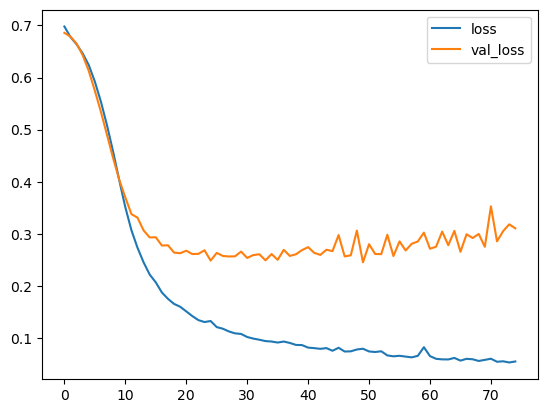

In [76]:
modelKaybi.plot()

In [77]:
# Grafikteki iyileşmeyi gözlemleyebiliyoruz.

## Şimdi de son olarak dropout özelliğini kullanalım. Kısaca kolonların atılarak overfitting iyileştirme durumu diyebiliriz.

In [78]:
#Model Oluşturma
model=Sequential()


model.add(Dense(units=30, activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15, activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=1, activation="sigmoid"))  


# Bu zamana kadar loss değeri için mse(mean squared error) kullandık ancak bu bir regresyon olduğu için bunda loss fonk. değişti.
model.compile(loss="binary_crossentropy",optimizer="adam")

In [79]:
model.fit(x=x_train , y=y_train, epochs=700, validation_data=(x_test,y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 10ms/step - loss: 0.7047 - val_loss: 0.6909
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6959 - val_loss: 0.6884
Epoch 3/700
12/12 [==============================] - 0s 4ms/step - loss: 0.7007 - val_loss: 0.6869
Epoch 4/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6816 - val_loss: 0.6855
Epoch 5/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6757 - val_loss: 0.6847
Epoch 6/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6741 - val_loss: 0.6840
Epoch 7/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6737 - val_loss: 0.6833
Epoch 8/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6594 - val_loss: 0.6825
Epoch 9/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6564 - val_loss: 0.6805
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6552 - val_loss: 0.6782
Epoch 11

12/12 [==============================] - 0s 5ms/step - loss: 0.2560 - val_loss: 0.2842
Epoch 84/700
12/12 [==============================] - 0s 5ms/step - loss: 0.2621 - val_loss: 0.2907
Epoch 85/700
12/12 [==============================] - 0s 5ms/step - loss: 0.2562 - val_loss: 0.2835
Epoch 86/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2287 - val_loss: 0.2858
Epoch 87/700
12/12 [==============================] - 0s 5ms/step - loss: 0.3221 - val_loss: 0.2784
Epoch 88/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2620 - val_loss: 0.2809
Epoch 89/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2570 - val_loss: 0.2878
Epoch 90/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2368 - val_loss: 0.2852
Epoch 91/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2122 - val_loss: 0.2840
Epoch 92/700
12/12 [==============================] - 0s 4ms/step - loss: 0.2390 - val_loss: 0.2882
Epoch 93/700


In [80]:
modelKaybi=pd.DataFrame(model.history.history)

<AxesSubplot:>

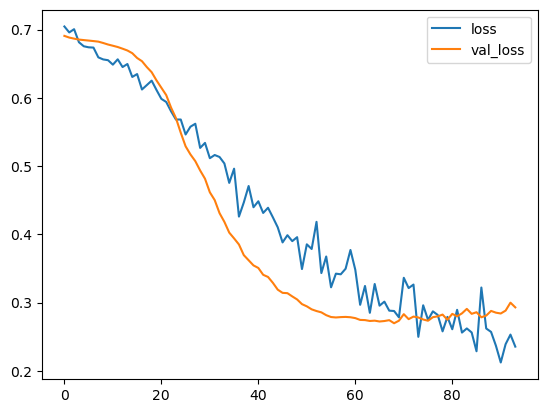

In [81]:
modelKaybi.plot()

In [83]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

6/6 [==============================] - 0s 2ms/step


In [84]:
predictions

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [89]:
from sklearn.metrics import classification_report, confusion_matrix   #Sınıflandırma accuarcy e bakacağız.

In [92]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        91
           1       0.87      0.91      0.89        74

    accuracy                           0.90       165
   macro avg       0.90      0.90      0.90       165
weighted avg       0.90      0.90      0.90       165



In [93]:
print(confusion_matrix(y_test,predictions))

[[81 10]
 [ 7 67]]
